# **Deteksi Outlier dengan metode Local Outlier Factor (LOF) dalam Data Understanding**
## APA ITU LOF
Local Outlier Factor (LOF) adalah metode berbasis kepadatan yang digunakan untuk mendeteksi outlier dengan membandingkan kepadatan lokal suatu titik data dengan kepadatan lokal tetangganya. Jika kepadatan suatu titik jauh lebih rendah dibandingkan dengan tetangganya, maka titik tersebut dianggap sebagai outlier.

Keunggulan LOF dibanding metode berbasis jarak lainnya seperti KNN Distance adalah kemampuannya menangani dataset dengan kepadatan yang bervariasi, sehingga lebih akurat dalam mendeteksi outlier pada data yang tidak terdistribusi secara merata.

## BAGAIMANA TAHAPAN LOF
Tahapan dari metode **Local Outlier Factor (LOF)** dalam mendeteksi outlier adalah sebagai berikut:

1. **Tentukan Jumlah Tetangga (k):**
   Tentukan jumlah tetangga terdekat (k) yang akan digunakan untuk perhitungan kepadatan lokal. Misalnya, `n_neighbors=90` yang berarti setiap titik akan dibandingkan dengan 90 tetangga terdekatnya.

2. **Hitung Jarak K-Tetangga Terdekat:**
   Untuk setiap titik data, hitung jarak ke k tetangga terdekat. Jarak ini digunakan untuk menentukan kepadatan lokal titik data tersebut.

3. **Hitung Kepadatan Lokal:**
   Hitung kepadatan lokal setiap titik data dengan melihat seberapa rapat titik tersebut dengan tetangganya dibandingkan dengan tetangga lainnya. Titik dengan kepadatan rendah lebih cenderung dianggap outlier.

4. **Hitung LOF (Local Outlier Factor):**
   Hitung rasio antara kepadatan lokal titik data terhadap kepadatan lokal tetangganya. Rasio ini disebut **LOF**. Titik dengan LOF yang lebih tinggi menunjukkan bahwa titik tersebut lebih terisolasi atau lebih tidak padat dibandingkan tetangganya, yang mengindikasikan bahwa titik tersebut adalah outlier.

5. **Penetapan Outlier:**
   Tentukan titik yang memiliki LOF lebih besar dari ambang batas tertentu sebagai outlier. Biasanya, titik dengan LOF lebih besar dari 1 dianggap outlier, karena menunjukkan bahwa titik tersebut lebih jarang ditemukan di daerah tersebut dibandingkan dengan tetangganya.

6. **Hasil Prediksi:**
   Setiap titik data diberi label -1 jika dianggap outlier dan 1 jika dianggap normal.
   
## CONTOH MENGHITUNG MANUAL LOF
Berikut adalah cara singkat menghitung **Local Outlier Factor (LOF)** untuk satu titik data dengan dua fitur:

1. **Dataset**:  
   Misalkan data berikut:

| ID  | Feature1  | Feature2 |
|-----|-----------|----------|
| 1   | 1.0       | 2.0      |
| 2   | 2.0       | 3.0      |
| 3   | 3.0       | 7.0      |
| 4   | 4.0       | 5.0      |
| 5   | 5.0       | 6.0      |
| 6   | 6.0       | 7.0      |
| 7   | 7.0       | 8.0      |
| 8   | 8.0       | 9.0      |
| 9   | 9.0       | 10.0     |
| 10  | 10.0      | 11.0     |

   Kita akan hitung LOF untuk **titik 3** (3.0, 7.0).

**3. Hitung Jarak Euclidean ke Titik Lainnya**
Jarak dari **titik 3 (3.0, 7.0) ke titik lainnya**:

- **Titik 3 ke Titik 1**: $( \sqrt{(3-1)^2 + (7-2)^2} = \sqrt{4 + 25} = 5.39)$
- **Titik 3 ke Titik 2**: $( \sqrt{(3-2)^2 + (7-3)^2} = \sqrt{1 + 16} = 4.12)$
- **Titik 3 ke Titik 4**: $( \sqrt{(3-4)^2 + (7-5)^2} = \sqrt{1 + 4} = 2.24 )$
- **Titik 3 ke Titik 5**: $( \sqrt{(3-5)^2 + (7-6)^2} = \sqrt{4 + 1} = 2.24 )$
- **Titik 3 ke Titik 6**: $( \sqrt{(3-6)^2 + (7-7)^2} = \sqrt{9 + 0} = 3.00 )$
- **Titik 3 ke Titik 7**: $( \sqrt{(3-7)^2 + (7-8)^2} = \sqrt{16 + 1} = 4.12 )$
- **Titik 3 ke Titik 8**: $( \sqrt{(3-8)^2 + (7-9)^2} = \sqrt{25 + 4} = 5.39 )$

3. **Tentukan k-Tetangga Terdekat** (k=2):  
   Titik 3 memiliki dua tetangga terdekat: titik 4 dan titik 5.
   1. Titik 4 (jarak 2.24)
   2. Titik 5 (jarak 2.24)

4. **Hitung Reachability Distance**:

   Reachability Distance(p,o)=max(k-distance(o),d(p,o))

   Karena k-distance(4) dan k-distance(5) lebih kecil dari jarak ke titik 3, maka:
   - Reachability Distance (Titik 3 ke Titik 4) = max(1.41, 2.24) = 2.24
   - Reachability Distance (Titik 3 ke Titik 5) = max(1.41, 2.24) = 2.24

5. **Hitung Local Reachability Density (LRD)**:  
   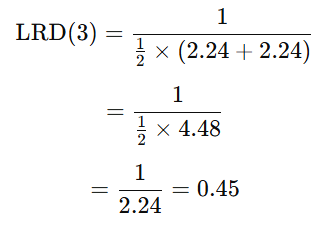

6. **Hitung LOF**:  
   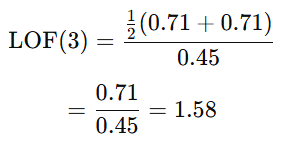

7. **Interpretasi**:  
   - LOF(3) = 1.58 > 1, **artinya titik 3 adalah outlier.**
   - **Titik 3 lebih terisolasi dibandingkan dengan tetangganya,** karena titik 4 dan 5 lebih dekat satu sama lain daripada ke titik 3.

LOF mengukur seberapa terisolasi titik dibandingkan tetangganya. Titik dengan LOF lebih besar dari 1 dianggap outlier.

## IMPLEMENTASI PAKAI SKLEARN UNTUK DATA CONTOH

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Dataset dengan 10 titik data
data = {
    'Feature1': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
    'Feature2': [2.0, 3.0, 7.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0]  # Titik 3 diubah ke (3.0, 7.0)
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Inisialisasi model LOF dengan k=2 (2 tetangga terdekat)
lof = LocalOutlierFactor(n_neighbors=2)

# Fit model LOF dan prediksi label (1 untuk normal, -1 untuk outlier)
lof_labels = lof.fit_predict(df)

# Menambahkan hasil prediksi ke DataFrame
df['LOF Label'] = lof_labels

# Menampilkan hasil
print(df)

# Menampilkan jumlah outlier
num_outliers = (lof_labels == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")

# Menampilkan data outlier
outliers = df[df['LOF Label'] == -1]
print("\nData Outlier:")
print(outliers)


   Feature1  Feature2  LOF Label
0       1.0       2.0          1
1       2.0       3.0          1
2       3.0       7.0          1
3       4.0       5.0          1
4       5.0       6.0          1
5       6.0       7.0          1
6       7.0       8.0          1
7       8.0       9.0          1
8       9.0      10.0          1
9      10.0      11.0          1

Jumlah outlier: 0

Data Outlier:
Empty DataFrame
Columns: [Feature1, Feature2, LOF Label]
Index: []


In [2]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.2 MB/s eta 0:00:00


Kode diatas digunakan untuk menginstal dua pustaka Python, yaitu `pymysql` dan `psycopg2`, yang berfungsi sebagai konektor untuk basis data (database). Pustaka `pymysql` digunakan untuk menghubungkan aplikasi Python dengan database MySQL atau MariaDB menggunakan protokol MySQL asli. Sementara itu, `psycopg2` merupakan pustaka yang digunakan untuk menghubungkan Python dengan database PostgreSQL, menyediakan antarmuka yang efisien untuk menjalankan perintah SQL dan berinteraksi dengan database tersebut. Kedua perintah ini menggunakan **magic command** `%pip`, yang umumnya digunakan dalam lingkungan Jupyter Notebook untuk memastikan bahwa paket yang diperlukan diinstal dalam kernel yang sedang berjalan.

In [3]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-289a0f88-pendataa.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_1tT_bnHq81keqZ9n-wh",
        database="defaultdb",
        port=22825
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-9b686fb-pendataa.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_ZuFdVS1OQkmHx4P1Wtp",
        database="defaultdb",
        port=22825
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

Kode diatas hanya untuk menggabungkan data dari 2 database saja

In [4]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik tanpa kolom 'class'
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merge[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=90)
label = clf.fit_predict(data_values)

# Tambahkan hasil label ke dataframe
df_merge["outlier_label"] = label

# Cetak hasil dengan ID dan class
print(df_merge.to_string(index=False))

num_outliers = (label == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")

outliers = df_merge[df_merge["outlier_label"] == -1]
print("\nData Outlier:")
print(outliers.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  outlier_label
  1     Iris-setosa           1.4          0.2           5.1          3.5              1
  2     Iris-setosa          14.0          2.0          40.9         30.0             -1
  3     Iris-setosa           1.3          0.2           4.7          3.2              1
  4     Iris-setosa           1.5          0.2           4.6          3.1              1
  5     Iris-setosa           1.4          0.2           5.0          3.6              1
  6     Iris-setosa           1.7          0.4           5.4          3.9              1
  7     Iris-setosa           1.4          0.3           4.6          3.4              1
  8     Iris-setosa           1.5          0.2           5.0          3.4              1
  9     Iris-setosa           1.4          0.2           4.4          2.9              1
 10     Iris-setosa           1.5          0.1           4.9          3.1              1
 11     Iris-setosa  

Kode di atas menggunakan metode Local Outlier Factor (LOF) untuk mendeteksi outlier pada data yang digabungkan dari dua database, yaitu PostgreSQL dan MySQL. Setelah data digabungkan berdasarkan kolom 'id' dan 'class', kode ini mengekstrak fitur numerik, seperti panjang dan lebar petal serta panjang dan lebar sepal, untuk analisis deteksi outlier lebih lanjut.

Metode LOF bekerja dengan mengidentifikasi outlier berdasarkan kepadatan lokal data. Artinya, LOF menilai seberapa terisolasi suatu titik data dibandingkan dengan titik-titik data sekitarnya. LOF menghitung rasio kepadatan antara suatu titik dan tetangganya; jika titik tersebut memiliki kepadatan yang jauh lebih rendah daripada tetangganya, maka titik tersebut dianggap sebagai outlier. Dalam kode ini, parameter n_neighbors=90 digunakan untuk menentukan bahwa model LOF akan mempertimbangkan 90 tetangga terdekat dalam analisis kepadatan.

Setelah model LOF dilatih menggunakan data fitur yang ada, metode fit_predict digunakan untuk memprediksi apakah setiap data merupakan outlier atau bukan. Hasil prediksi ini berupa label, dengan nilai -1 yang menunjukkan outlier dan 1 yang menunjukkan data normal. Label ini kemudian ditambahkan ke dalam dataframe sebagai kolom baru bernama outlier_label.

Hasil deteksi outlier selanjutnya dicetak, termasuk ID dan kelas data, jumlah outlier yang terdeteksi, serta data outlier itu sendiri. Kode ini juga memisahkan data yang terdeteksi sebagai outlier (dengan label -1) dan menampilkannya secara terpisah.